![alt text](image.png)

![alt text](image-1.png)

![alt text](image-2.png)

![alt text](image-3.png)

/tmp/ipykernel_5547/2786439946.py:5: RuntimeWarning: invalid value encountered in scalar divide
  return x**2 / (np.exp(x) - 1)


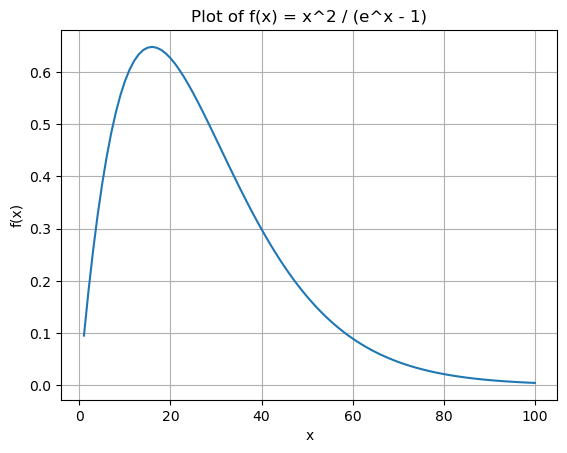

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**2 / (np.exp(x) - 1)

pontos = []
x = 0
while x <= 10:
    pontos.append(f(x))
    x += 0.1

plt.plot(pontos)
plt.title("Plot of f(x) = x^2 / (e^x - 1)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid()
plt.show()

![alt text](image-4.png)

![alt text](image-5.png)